# TUIA NLP 2025 - TP 1 - Parte 2

## Descarga de Datos

In [2]:
!pip install -q gdown
import gdown
import zipfile
import os

file_id = '1liIFgFkBaBApd11S1ZiTWXtrhU6qhNMz'
output = 'Datos.zip'

# Descargo la carpeta de datos comprimida como .zip
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Descomprimir
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Carpeta destino

Downloading...
From: https://drive.google.com/uc?id=1liIFgFkBaBApd11S1ZiTWXtrhU6qhNMz
To: /content/Datos.zip
100%|██████████| 182k/182k [00:00<00:00, 64.7MB/s]


## Ejercicio 2

In [3]:
# Reinstalo nltk completamente para evitar conflictos
!pip install --force-reinstall -q nltk

# Descargo el recurso punkt
import nltk
nltk.download('punkt')

# Descargo el recurso punkt_tab necesario para tokenización en español
nltk.download('punkt_tab')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
from nltk.tokenize import sent_tokenize

with open('/content/Datos/Información/texto_foros_strategy.txt', encoding='utf-8') as f:
    texto = f.read()

# Tokenizo el texto en oraciones
oraciones = sent_tokenize(texto)

# Agrupo las oraciones de a 3 para evaluar cual me combiene
bloques_de_3 = [' '.join(oraciones[i:i+3]) for i in range(0, len(oraciones), 3)]

print(f"Cantidad de oraciones individuales: {len(oraciones)}")
print(f"Cantidad de bloques de 3 oraciones: {len(bloques_de_3)}")

print("\nEjemplo de oración individual:")
print(oraciones[0])

print("\nEjemplo de bloque de 3 oraciones:")
print(bloques_de_3[0])

Cantidad de oraciones individuales: 253
Cantidad de bloques de 3 oraciones: 85

Ejemplo de oración individual:
That's a really dull selection!

Ejemplo de bloque de 3 oraciones:
That's a really dull selection! I'd probably (depending on my monument) very dully focus on cottages. Couple of farms and some chapels.


### Vectorizo ambos conjuntos con TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorizo el corpus con oraciones individuales
vectorizador_oraciones = TfidfVectorizer()
X_oraciones = vectorizador_oraciones.fit_transform(oraciones)

# Vectorizo el corpus con bloques de 3 oraciones
vectorizador_bloques = TfidfVectorizer()
X_bloques = vectorizador_bloques.fit_transform(bloques_de_3)

In [6]:
def buscar_similares(query, vectorizador, matriz_tfidf, fragmentos, top_n=3):
    '''
    Función para mostrar los resultados de similitud para un corpus dado
    '''
    # Vectorizo la consulta que ingreso
    query_vec = vectorizador.transform([query])

    # Calculo la similitud del coseno entre la consulta y todos los fragmentos
    similitudes = cosine_similarity(query_vec, matriz_tfidf).flatten()

    # Obtengo los índices de los fragmentos más similares
    indices_top = similitudes.argsort()[::-1][:top_n]

    for i in indices_top:
        print(f"\n🔎 Similitud: {similitudes[i]:.3f}")
        print(fragmentos[i])
        print("-" * 80)

In [7]:
# Defino una consulta de ejemplo
query = "How to score high using Tailors?"

print("Resultados con oraciones individuales:")
buscar_similares(query, vectorizador_oraciones, X_oraciones, oraciones)

print("\nResultados con bloques de 3 oraciones:")
buscar_similares(query, vectorizador_bloques, X_bloques, bloques_de_3)

Resultados con oraciones individuales:

🔎 Similitud: 0.257
My first question would be, how are you feeding those cottages to ensure that they score points?
--------------------------------------------------------------------------------

🔎 Similitud: 0.253
Then pump out tailors.
--------------------------------------------------------------------------------

🔎 Similitud: 0.239
It wouldn't be a high scoring game
I'd go monument first, then all tailor+millstone
Wow that's a low score.
--------------------------------------------------------------------------------

Resultados con bloques de 3 oraciones:

🔎 Similitud: 0.239
As far as high scores go, there are a lot of variables. Obviously the buildings you play with make a huge impact on your ability to score big. My highest score is 47.
--------------------------------------------------------------------------------

🔎 Similitud: 0.208
It wouldn't be a high scoring game
I'd go monument first, then all tailor+millstone
Wow that's a low s

In [8]:
# Probando una query distinta
query = "Best buildings to start with?"

print("Resultados con oraciones individuales:")
buscar_similares(query, vectorizador_oraciones, X_oraciones, oraciones)

print("\nResultados con bloques de 3 oraciones:")
buscar_similares(query, vectorizador_bloques, X_bloques, bloques_de_3)

Resultados con oraciones individuales:

🔎 Similitud: 0.435
I often start with ~2 5-6 cube buildings, then continue with a mix of 3/4 cube buildings.
--------------------------------------------------------------------------------

🔎 Similitud: 0.326
Just topped by best with 48.
--------------------------------------------------------------------------------

🔎 Similitud: 0.310
Best solution.
--------------------------------------------------------------------------------

Resultados con bloques de 3 oraciones:

🔎 Similitud: 0.308
Best solution.
--------------------------------------------------------------------------------

🔎 Similitud: 0.267
What’s others best solo game scores? But if you’ve filled your board with your intended buildings, you don’t need cubes anymore. 52, I think, but I am the developer of the game and I specifically tried to have the best setup.
--------------------------------------------------------------------------------

🔎 Similitud: 0.266
My goal is to be one 

In [9]:
# Probando otra query distinta
query = "What are cottages good for?"

print("Resultados con oraciones individuales:")
buscar_similares(query, vectorizador_oraciones, X_oraciones, oraciones)

print("\nResultados con bloques de 3 oraciones:")
buscar_similares(query, vectorizador_bloques, X_bloques, bloques_de_3)

Resultados con oraciones individuales:

🔎 Similitud: 0.291
As noted above, cottages are good value for their size and tend to pay out more reliably than other buildings (even a cloister strategy is riskier).
--------------------------------------------------------------------------------

🔎 Similitud: 0.262
What can you get?
--------------------------------------------------------------------------------

🔎 Similitud: 0.245
If you built 1 Farm, 4 Cottages, and 3 Wells, you could score a max of 12VP for the Cottages and 8VP for the Wells for a total of 20VP across 8 buildings for 2.5VP per building.
--------------------------------------------------------------------------------

Resultados con bloques de 3 oraciones:

🔎 Similitud: 0.231
It's especially bad when the red building is the granary, which feeds cottages in the 8 squares surrounding it. This makes a cottage strategy quite easy (and dull). As noted above, cottages are good value for their size and tend to pay out more reliably

Para este tipo de queries más abiertas y estratégicas, los bloques de 3 oraciones son más útiles para el análisis del usuario, aunque sus puntuaciones TF-IDF sean más bajas.


### Vectorizo usando CountVectorizer en modo binario

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizo las oraciones individuales con representación binaria
vectorizador_bin_oraciones = CountVectorizer(binary=True)
X_bin_oraciones = vectorizador_bin_oraciones.fit_transform(oraciones)

# Vectorizo los bloques de 3 oraciones con representación binaria
vectorizador_bin_bloques = CountVectorizer(binary=True)
X_bin_bloques = vectorizador_bin_bloques.fit_transform(bloques_de_3)


In [11]:
import numpy as np

# Calculo la similitud de Jaccard entre dos vectores binarios
def jaccard_similarity(v1, v2):
    intersection = np.logical_and(v1, v2).sum()
    union = np.logical_or(v1, v2).sum()
    return intersection / union if union != 0 else 0

# Calculo la similitud de Dice
def dice_similarity(v1, v2):
    intersection = np.logical_and(v1, v2).sum()
    return 2 * intersection / (v1.sum() + v2.sum()) if (v1.sum() + v2.sum()) != 0 else 0


In [12]:
def buscar_similares_binarios(query, vectorizador, matriz, fragmentos, metrica="jaccard", top_n=3):
    # Vectorizo la consulta en binario
    vec_query = vectorizador.transform([query]).toarray()[0]

    similitudes = []
    for i in range(matriz.shape[0]):
        vec_doc = matriz[i].toarray()[0]

        if metrica == "jaccard":
            score = jaccard_similarity(vec_query, vec_doc)
        elif metrica == "dice":
            score = dice_similarity(vec_query, vec_doc)
        else:
            raise ValueError("Métrica no reconocida")

        similitudes.append(score)

    # Ordeno por similitud descendente
    indices_top = np.argsort(similitudes)[::-1][:top_n]

    for i in indices_top:
        print(f"\n🔎 Similitud: {similitudes[i]:.3f}")
        print(fragmentos[i])
        print("-" * 80)


In [13]:
query = "Best buildings to start with?"

print("Jaccard - oraciones individuales:")
buscar_similares_binarios(query, vectorizador_bin_oraciones, X_bin_oraciones, oraciones, metrica="jaccard")

print("\nJaccard - bloques de 3 oraciones:")
buscar_similares_binarios(query, vectorizador_bin_bloques, X_bin_bloques, bloques_de_3, metrica="jaccard")

print("\nDice - oraciones individuales:")
buscar_similares_binarios(query, vectorizador_bin_oraciones, X_bin_oraciones, oraciones, metrica="dice")

print("\nDice - bloques de 3 oraciones:")
buscar_similares_binarios(query, vectorizador_bin_bloques, X_bin_bloques, bloques_de_3, metrica="dice")


Jaccard - oraciones individuales:

🔎 Similitud: 0.273
I often start with ~2 5-6 cube buildings, then continue with a mix of 3/4 cube buildings.
--------------------------------------------------------------------------------

🔎 Similitud: 0.222
Just topped by best with 48.
--------------------------------------------------------------------------------

🔎 Similitud: 0.176
Obviously the buildings you play with make a huge impact on your ability to score big.
--------------------------------------------------------------------------------

Jaccard - bloques de 3 oraciones:

🔎 Similitud: 0.167
Best solution.
--------------------------------------------------------------------------------

🔎 Similitud: 0.129
My goal is to be one of the last players out. If you're the last player, you can often have only one empty space at the end. I often start with ~2 5-6 cube buildings, then continue with a mix of 3/4 cube buildings.
-----------------------------------------------------------------------

In [14]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

def comparar_metricas_distancia(query, vectorizador, matriz_tfidf, fragmentos, top_n=3):
    """Compara diferentes métricas de distancia"""
    query_vec = vectorizador.transform([query])

    # Coseno (similitud - mayor es mejor)
    sim_coseno = cosine_similarity(query_vec, matriz_tfidf).flatten()

    # Euclidiana (distancia - menor es mejor)
    dist_euclidiana = euclidean_distances(query_vec, matriz_tfidf).flatten()

    # Manhattan (distancia - menor es mejor)
    dist_manhattan = manhattan_distances(query_vec, matriz_tfidf).flatten()

    # Convierto distancias a similitudes para comparar
    sim_euclidiana = 1 / (1 + dist_euclidiana)
    sim_manhattan = 1 / (1 + dist_manhattan)

    print("COMPARACIÓN DE MÉTRICAS:\n")


    # Top 3 para cada métrica
    for metric_name, similarities in [
        ("Coseno", sim_coseno),
        ("Euclidiana", sim_euclidiana),
        ("Manhattan", sim_manhattan)
    ]:
        print(f"\n🔹 {metric_name}:")
        indices_top = similarities.argsort()[::-1][:top_n]
        for i, idx in enumerate(indices_top):
            print(f"  {i+1}. Score: {similarities[idx]:.3f}")
            print(f"     Text: {fragmentos[idx][:100]}...")

### Visualización 3D con PCA


In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualizar_embeddings_3d(matriz_tfidf, fragmentos, query, vectorizador):
    """Visualiza embeddings en 3D usando PCA"""

    # Agrego la query al conjunto
    query_vec = vectorizador.transform([query])
    matriz_completa = np.vstack([matriz_tfidf.toarray(), query_vec.toarray()])

    # Reduzco dimensionalidad con PCA
    pca = PCA(n_components=3)
    coords_3d = pca.fit_transform(matriz_completa)

    # Creo la visualización
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotear fragmentos
    ax.scatter(coords_3d[:-1, 0], coords_3d[:-1, 1], coords_3d[:-1, 2],
               c='blue', alpha=0.6, s=50, label='Fragmentos')

    # Plotear query
    ax.scatter(coords_3d[-1, 0], coords_3d[-1, 1], coords_3d[-1, 2],
               c='red', s=200, marker='*', label='Query')

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} var)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} var)')
    ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} var)')
    ax.legend()
    ax.set_title('Visualización 3D de Embeddings TF-IDF')

    plt.tight_layout()
    plt.show()

    print(f"Varianza explicada total: {sum(pca.explained_variance_ratio_):.2%}")

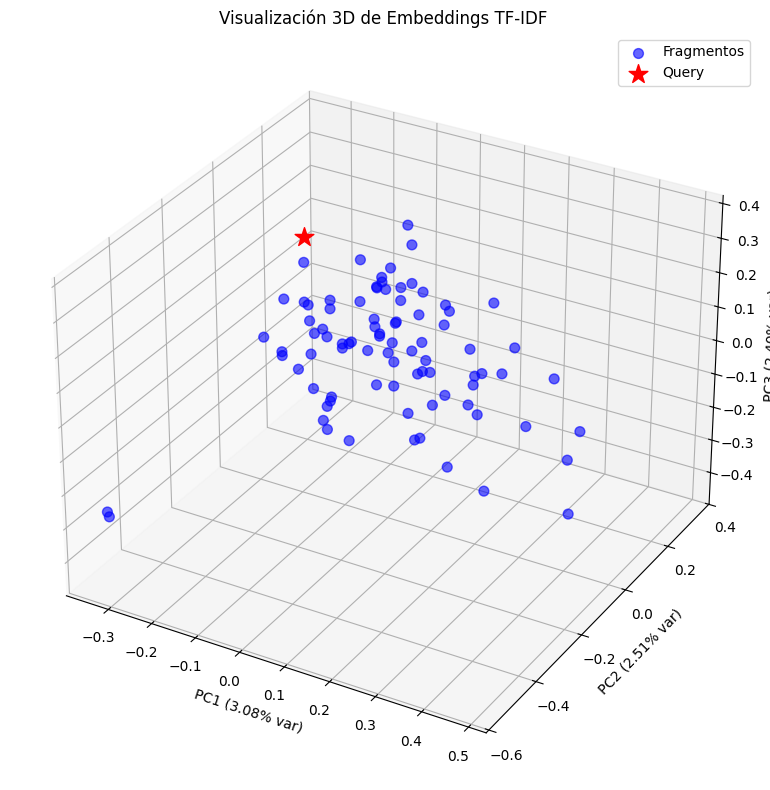

Varianza explicada total: 7.99%


In [16]:
visualizar_embeddings_3d(X_bloques, bloques_de_3, "How to score high using Tailors?", vectorizador_bloques)

## Ejercicio 3

In [18]:
# Instalo las librerías necesarias
!pip install -q spacy
!python -m spacy download en_core_web_sm

import spacy
from collections import Counter

# Cargo el modelo de spaCy
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Definicion de funciones

#### Extraer sustantivos y entidades

In [19]:
def extraer_sustantivos_y_entidades(texto):
    """Extrae sustantivos (POS) y entidades nombradas (NER)"""
    doc = nlp(texto)

    # Extraigo los sustantivos
    sustantivos = [token.text.lower() for token in doc
                   if token.pos_ == "NOUN" and not token.is_stop and token.is_alpha]

    # Extraigo las entidades nombradas
    entidades = [(ent.text, ent.label_) for ent in doc.ents]

    return sustantivos, entidades


#### Procesar corpus

In [20]:
def procesar_corpus_con_pos_ner():
    """Procesa todos los textos extrayendo sustantivos y entidades"""

    # Cargar y procesar todos los textos de información
    import os
    textos = {}

    info_dir = "/content/Datos/Información/"
    for archivo in os.listdir(info_dir):
        if archivo.endswith('.txt'):
            with open(os.path.join(info_dir, archivo), 'r', encoding='utf-8') as f:
                textos[archivo] = f.read()

    # Procesar cada texto
    resultados = {}
    for nombre, texto in textos.items():
        print(f"Procesando {nombre}...")
        sustantivos, entidades = extraer_sustantivos_y_entidades(texto)
        resultados[nombre] = {
            'sustantivos': sustantivos,
            'entidades': entidades,
            'texto_original': texto
        }

    return resultados

#### Busqueda por sustantivos

In [21]:
def busqueda_por_sustantivos(query, resultados_pos_ner, top_n=3):
    """Búsqueda basada en sustantivos extraídos"""

    # Extraigo los sustantivos de la query
    sustantivos_query, _ = extraer_sustantivos_y_entidades(query)

    if not sustantivos_query:
        print("No se encontraron sustantivos en la query")
        return

    # Calculo similitud basada en sustantivos comunes
    scores = {}
    for archivo, datos in resultados_pos_ner.items():
        sustantivos_doc = datos['sustantivos']

        # Intersección de sustantivos
        comunes = set(sustantivos_query) & set(sustantivos_doc)

        # Score basado en Jaccard
        union = set(sustantivos_query) | set(sustantivos_doc)
        score = len(comunes) / len(union) if union else 0

        scores[archivo] = score

    # Mostrar top resultados
    print(f"Búsqueda por sustantivos: '{query}'")
    print("Sustantivos en query:", sustantivos_query)
    print("=" * 50)

    for archivo, score in sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]:
        print(f"\n {archivo} - Score: {score:.3f}")
        # Mostrar sustantivos comunes
        comunes = set(sustantivos_query) & set(resultados_pos_ner[archivo]['sustantivos'])
        print(f"Sustantivos comunes: {list(comunes)}")
        print(f"Texto: {resultados_pos_ner[archivo]['texto_original'][:200]}...")


### Resultado

In [22]:
resultados = procesar_corpus_con_pos_ner()
busqueda_por_sustantivos("strategy buildings", resultados)

Procesando texto_foros_strategy.txt...
Procesando video1.txt...
Procesando video2.txt...
Procesando texto_misutmeeple_contenido.txt...
Procesando texto_foros_variants.txt...
Procesando video3.txt...
Procesando manual.txt...
Procesando texto_misutmeeple_introduccion.txt...
Procesando texto_misutmeeple_opinion.txt...
Procesando review_bgg.txt...
Procesando review_externa.txt...
Procesando video4.txt...
Procesando descripcion_juego.txt...
Procesando texto_misutmeeple_mecanica.txt...
Búsqueda por sustantivos: 'strategy buildings'
Sustantivos en query: ['strategy', 'buildings']

 descripcion_juego.txt - Score: 0.034
Sustantivos comunes: ['buildings']
Texto: You are the mayor of a tiny town in the forest in which the smaller creatures of the woods have created a civilization hidden away from predators. This new land is small and the resources are scarce, ...

 texto_foros_strategy.txt - Score: 0.008
Sustantivos comunes: ['buildings', 'strategy']
Texto: That's a really dull selection! I'd pro

## Ejercicio 4

In [23]:
# Instalo las librerías necesarias
!pip install -q langdetect

from langdetect import detect, detect_langs
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


### Funcion para detectar idiomas

In [24]:
def detectar_idiomas_archivos():
    """Detecta el idioma de cada archivo y crea un DataFrame"""

    resultados = []

    # Procesar archivos de todas las carpetas
    for carpeta in ['Información', 'Estadísticas', 'Relaciones']:
        carpeta_path = f"/content/Datos/{carpeta}/"

        for archivo in os.listdir(carpeta_path):
            filepath = os.path.join(carpeta_path, archivo)

            try:
                if archivo.endswith('.txt'):
                    with open(filepath, 'r', encoding='utf-8') as f:
                        contenido = f.read()

                    # Detectar idioma
                    idioma = detect(contenido)
                    confianza = detect_langs(contenido)[0].prob

                elif archivo.endswith('.csv'):
                    # Para CSV, analizar columnas de texto
                    df = pd.read_csv(filepath)

                    # Encontrar columnas de texto
                    texto_cols = df.select_dtypes(include=['object']).columns

                    if len(texto_cols) > 0:
                        # Concatenar texto de las primeras filas
                        texto_muestra = ' '.join(df[texto_cols[0]].dropna().head(10).astype(str))
                        idioma = detect(texto_muestra)
                        confianza = detect_langs(texto_muestra)[0].prob
                    else:
                        idioma = 'unknown'
                        confianza = 0.0

                resultados.append({
                    'archivo': archivo,
                    'carpeta': carpeta,
                    'idioma': idioma,
                    'confianza': confianza,
                    'ruta': filepath
                })

            except Exception as e:
                resultados.append({
                    'archivo': archivo,
                    'carpeta': carpeta,
                    'idioma': 'error',
                    'confianza': 0.0,
                    'ruta': filepath
                })

    df_idiomas = pd.DataFrame(resultados)
    return df_idiomas

In [25]:
df_idiomas = detectar_idiomas_archivos()
print(df_idiomas)

                               archivo       carpeta idioma  confianza  \
0             texto_foros_strategy.txt   Información     en   0.999998   
1                           video1.txt   Información     nl   0.999995   
2                           video2.txt   Información     en   0.999998   
3      texto_misutmeeple_contenido.txt   Información     es   0.999995   
4             texto_foros_variants.txt   Información     en   0.999998   
5                           video3.txt   Información     en   0.999996   
6                           manual.txt   Información     en   0.999998   
7   texto_misutmeeple_introduccion.txt   Información     es   0.999997   
8        texto_misutmeeple_opinion.txt   Información     es   0.999995   
9                       review_bgg.txt   Información     es   0.999996   
10                    df_foros_bgg.csv   Información     af   0.857140   
11                  review_externa.txt   Información     es   0.999997   
12                          video4.txt

## Ejercicio 5

In [26]:
# Instalo las librerías necesarias
!pip install -q transformers torch

from transformers import pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00


### Funcion de analizar sentimientos

In [27]:
def analizar_sentimientos_resenas():
    """Analiza sentimientos de las reseñas usando modelos preentrenados"""

    # Cargo los archivos

    analizador = pipeline("sentiment-analysis",
                         model="cardiffnlp/twitter-roberta-base-sentiment-latest")

    df_resenas = pd.read_csv("/content/Datos/Estadísticas/reseñas_Tiny_Towns.csv")

    print(f"Analizando {len(df_resenas)} reseñas...")

    # Analizar sentimientos
    sentimientos = []
    for idx, row in df_resenas.iterrows():
        try:
            # Tomar una muestra del texto si es muy largo
            texto = str(row.iloc[0])[:500] if len(str(row.iloc[0])) > 500 else str(row.iloc[0])

            resultado = analizador(texto)
            sentimientos.append({
                'indice': idx,
                'sentimiento': resultado[0]['label'],
                'confianza': resultado[0]['score'],
                'texto': texto
            })
        except:
            sentimientos.append({
                'indice': idx,
                'sentimiento': 'UNKNOWN',
                'confianza': 0.0,
                'texto': str(row.iloc[0])
            })

    df_sentimientos = pd.DataFrame(sentimientos)
    return df_sentimientos

### Funcion de busqueda

In [28]:
def sistema_busqueda_con_filtro_sentimiento(df_sentimientos, query, filtro_sentimiento=None):
    """Sistema de búsqueda que permite filtrar por sentimiento"""

    # Filtrar por sentimiento si se especifica
    if filtro_sentimiento:
        df_filtrado = df_sentimientos[df_sentimientos['sentimiento'] == filtro_sentimiento]
    else:
        df_filtrado = df_sentimientos

    if len(df_filtrado) == 0:
        print(f"No se encontraron reseñas con sentimiento {filtro_sentimiento}")
        return

    # Vectorizar textos filtrados
    vectorizador = TfidfVectorizer(max_features=1000, stop_words='english')
    textos = df_filtrado['texto'].tolist()

    if len(textos) == 0:
        print("No hay textos para analizar")
        return

    X = vectorizador.fit_transform(textos)

    # Buscar similitud con la query
    query_vec = vectorizador.transform([query])
    similitudes = cosine_similarity(query_vec, X).flatten()

    # Mostrar resultados
    indices_top = similitudes.argsort()[::-1][:5]

    print(f"Búsqueda: '{query}'")
    if filtro_sentimiento:
        print(f"Filtrado por sentimiento: {filtro_sentimiento}")
    print("=" * 50)

    for i, idx in enumerate(indices_top):
        fila = df_filtrado.iloc[idx]
        print(f"\n{i+1}. Similitud: {similitudes[idx]:.3f}")
        print(f"   Sentimiento: {fila['sentimiento']} ({fila['confianza']:.3f})")
        print(f"   Texto: {fila['texto'][:200]}...")

In [29]:
df_sentimientos = analizar_sentimientos_resenas()
sistema_busqueda_con_filtro_sentimiento(df_sentimientos, "great game", "POSITIVE")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


Analizando 500 reseñas...
No se encontraron reseñas con sentimiento POSITIVE


## Ejercicio 6

### Funcion para gener consultas

In [30]:
def generar_dataset_consultas():
    """Genera un dataset de más de 300 consultas categorizadas"""

    consultas = []

    # Consultas de INFORMACIÓN (sobre reglas, mecánicas, etc.)
    consultas_info = [
        "¿Cómo se juega Tiny Towns?",
        "¿Cuáles son las reglas básicas?",
        "¿Qué hace cada tipo de edificio?",
        "¿Cómo funcionan los monumentos?",
        "¿Cuándo termina el juego?",
        "¿Qué es una casa de campo?",
        "¿Cómo se construyen los edificios?",
        "¿Qué recursos necesito para cada edificio?",
        "¿Cuáles son las fases del turno?",
        "¿Cómo se colocan los recursos?",
        "¿Qué hace el granero?",
        "¿Cómo funcionan las capillas?",
        "¿Qué es un pozo?",
        "¿Cómo se usan las fábricas?",
        "¿Qué hacen los sastres?",
        "¿Cuándo puedo construir?",
        "¿Cómo se alimentan los edificios?",
        "¿Qué pasa si no puedo colocar un recurso?",
        "¿Cómo se cuentan los puntos?",
        "¿Qué significa cada símbolo?",
        # ... más consultas de información
    ]

    # Consultas de ESTADÍSTICAS (sobre puntuaciones, rankings, etc.)
    consultas_stats = [
        "¿Cuál es la puntuación más alta registrada?",
        "¿Qué edificio da más puntos?",
        "¿Cuál es la puntuación promedio?",
        "¿Qué estrategia tiene mejor ratio de victoria?",
        "¿Cuántos puntos vale cada monumento?",
        "¿Cuál es la diferencia de puntos típica?",
        "¿Qué porcentaje de partidas terminan en empate?",
        "¿Cuántos edificios se construyen en promedio?",
        "¿Cuál es el tiempo promedio de partida?",
        "¿Qué monumento se elige más frecuentemente?",
        "¿Cuántos recursos se usan por partida?",
        "¿Qué combinación de edificios da más puntos?",
        "¿Cuál es la eficiencia por espacio de cada edificio?",
        "¿Qué estrategia tiene mayor consistencia?",
        "¿Cuántos jugadores prefieren cada estrategia?",
        # ... más consultas estadísticas
    ]

    # Consultas de RELACIONES (sobre interacciones, sinergias, etc.)
    consultas_relaciones = [
        "¿Qué edificios trabajan bien juntos?",
        "¿Cómo se relacionan las casas con otros edificios?",
        "¿Qué monumentos combinan mejor?",
        "¿Cuál es la sinergia entre sastres y otros edificios?",
        "¿Qué edificios dependen de otros para funcionar?",
        "¿Cómo interactúan los pozos con las casas?",
        "¿Qué edificios bloquean a otros?",
        "¿Cuáles son las mejores combinaciones?",
        "¿Qué edificios compiten por los mismos recursos?",
        "¿Cómo afectan los monumentos a la estrategia?",
        "¿Qué edificios son complementarios?",
        "¿Cuál es la cadena de dependencias?",
        "¿Qué edificios inhiben estrategias?",
        "¿Cómo se conectan las diferentes estrategias?",
        "¿Qué patrones de construcción son más efectivos?",
        # ... más consultas de relaciones
    ]

    # Crear dataset completo (vamos a generar más automáticamente)
    import random

    # Plantillas para generar más consultas
    plantillas_info = [
        "¿Cómo funciona {edificio}?",
        "¿Qué hace {edificio}?",
        "¿Cuándo se puede usar {edificio}?",
        "¿Qué recursos necesita {edificio}?",
        "¿Dónde se coloca {edificio}?"
    ]

    plantillas_stats = [
        "¿Cuántos puntos da {edificio}?",
        "¿Cuál es el promedio de {edificio}?",
        "¿Qué tan frecuente es {edificio}?",
        "¿Cuál es la eficiencia de {edificio}?",
        "¿Qué ranking tiene {edificio}?"
    ]

    plantillas_relaciones = [
        "¿Cómo interactúa {edificio1} con {edificio2}?",
        "¿Qué relación hay entre {edificio1} y {edificio2}?",
        "¿Se complementan {edificio1} y {edificio2}?",
        "¿Compiten {edificio1} y {edificio2}?",
        "¿Cuál es mejor, {edificio1} o {edificio2}?"
    ]

    edificios = ["cottage", "well", "farm", "tailor", "chapel", "granary", "factory", "monument"]

    # Generar más consultas usando plantillas
    for plantilla in plantillas_info:
        for edificio in edificios:
            consultas_info.append(plantilla.format(edificio=edificio))

    for plantilla in plantillas_stats:
        for edificio in edificios:
            consultas_stats.append(plantilla.format(edificio=edificio))

    for plantilla in plantillas_relaciones:
        for edificio1 in edificios:
            for edificio2 in edificios:
                if edificio1 != edificio2:
                    consultas_relaciones.append(plantilla.format(edificio1=edificio1, edificio2=edificio2))

    # Crear DataFrame
    dataset = []

    for consulta in consultas_info[:120]:  # Limitar para balancear
        dataset.append({'consulta': consulta, 'categoria': 'Información'})

    for consulta in consultas_stats[:120]:
        dataset.append({'consulta': consulta, 'categoria': 'Estadística'})

    for consulta in consultas_relaciones[:120]:
        dataset.append({'consulta': consulta, 'categoria': 'Relaciones'})

    df_consultas = pd.DataFrame(dataset)

    # Mezclar el dataset
    df_consultas = df_consultas.sample(frac=1).reset_index(drop=True)

    print(f"Dataset generado con {len(df_consultas)} consultas")
    print(df_consultas['categoria'].value_counts())

    return df_consultas

### Funcion para entrenar los modelos

In [31]:
def entrenar_clasificador_consultas(df_consultas):
    """Entrena múltiples modelos para clasificar consultas"""

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import classification_report, confusion_matrix

    # Preparar datos
    X = df_consultas['consulta']
    y = df_consultas['categoria']

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Vectorizar
    vectorizador = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
    X_train_vec = vectorizador.fit_transform(X_train)
    X_test_vec = vectorizador.transform(X_test)

    # Entrenar múltiples modelos
    modelos = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'SVM': SVC(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Naive Bayes': MultinomialNB()
    }

    resultados = {}

    for nombre, modelo in modelos.items():
        print(f"\nEntrenando {nombre}...")

        # Entrenar
        modelo.fit(X_train_vec, y_train)

        # Predecir
        y_pred = modelo.predict(X_test_vec)

        # Evaluar
        print(f"\n--- {nombre} ---")
        print(classification_report(y_test, y_pred))

        resultados[nombre] = {
            'modelo': modelo,
            'accuracy': modelo.score(X_test_vec, y_test)
        }

    # Retornar el mejor modelo
    mejor_modelo = max(resultados.items(), key=lambda x: x[1]['accuracy'])
    print(f"\nMejor modelo: {mejor_modelo[0]} con accuracy: {mejor_modelo[1]['accuracy']:.3f}")

    return vectorizador, mejor_modelo[1]['modelo'], resultados


In [32]:
df_consultas = generar_dataset_consultas()
vectorizador, modelo, resultados = entrenar_clasificador_consultas(df_consultas)

print(vectorizador, modelo, df_consultas)

Dataset generado con 235 consultas
categoria
Relaciones     120
Información     60
Estadística     55
Name: count, dtype: int64

Entrenando Logistic Regression...

--- Logistic Regression ---
              precision    recall  f1-score   support

 Estadística       1.00      1.00      1.00        11
 Información       0.83      0.83      0.83        12
  Relaciones       0.92      0.92      0.92        24

    accuracy                           0.91        47
   macro avg       0.92      0.92      0.92        47
weighted avg       0.91      0.91      0.91        47


Entrenando SVM...

--- SVM ---
              precision    recall  f1-score   support

 Estadística       1.00      1.00      1.00        11
 Información       0.86      1.00      0.92        12
  Relaciones       1.00      0.92      0.96        24

    accuracy                           0.96        47
   macro avg       0.95      0.97      0.96        47
weighted avg       0.96      0.96      0.96        47


Entrenando Ra